# 6. Tables


## 6.3. Example: Population Trends

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [2]:
data = 'http://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2010-2019/nc-est2019-agesex-res.csv'
full_census_table = pd.read_table(data,sep=',')
full_census_table.head(10)

,SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019
0,0,0,3944153,3944160,3951430,3963092,3926570,3931258,3954787,3983981,3954773,3893990,3815343,3783052
1,0,1,3978070,3978090,3957730,3966225,3977549,3942698,3948891,3973133,4002903,3972711,3908830,3829599
2,0,2,4096929,4096939,4090621,3970654,3978925,3991740,3958711,3966321,3991349,4020045,3987032,3922044
3,0,3,4119040,4119051,4111688,4101644,3981531,3991017,4005928,3974351,3982984,4006946,4033038,3998665
4,0,4,4063170,4063186,4077346,4121488,4111490,3992502,4004032,4020292,3989750,3997280,4018719,4043323
5,0,5,4056858,4056872,4064521,4087054,4131049,4121876,4004576,4017589,4035033,4003452,4008443,4028281
6,0,6,4066381,4066412,4072904,4074531,4096631,4141126,4133372,4017388,4031568,4048018,4014057,4017227
7,0,7,4030579,4030594,4042990,4082821,4084175,4106756,4152666,4145872,4030888,4044139,4058370,4022319
8,0,8,4046486,4046497,4025501,4052773,4092559,4094513,4118349,4165033,4158848,4042924,4054236,4066194
9,0,9,4148353,4148369,4125312,4035319,4062726,4103052,4106068,4130887,4177895,4170813,4053179,4061874


The *SEX* column contains numeric codes: 0 stands for the total, 1 for male, and 2 for female.
The *AGE* column contains ages in completed years, but the special value **999** is a **sum of the total population**.
The age **100** includes **all people aged 100 or more**.

Suppose we are only interested in the population changes from 2014 to 2019. 

Let's select the relevant columns


In [3]:
partial_census_table = full_census_table[['SEX', 'AGE', 'POPESTIMATE2014', 'POPESTIMATE2019']]
partial_census_table.head(10)

,SEX,AGE,POPESTIMATE2014,POPESTIMATE2019
0,0,0,3954787,3783052
1,0,1,3948891,3829599
2,0,2,3958711,3922044
3,0,3,4005928,3998665
4,0,4,4004032,4043323
5,0,5,4004576,4028281
6,0,6,4133372,4017227
7,0,7,4152666,4022319
8,0,8,4118349,4066194
9,0,9,4106068,4061874


Siplify the labels of the selected columns.

In [4]:
us_pop = partial_census_table.rename(columns = {'POPESTIMATE2014':'2014'}).rename(columns = {'POPESTIMATE2019':'2019'})
us_pop.head(10)

,SEX,AGE,2014,2019
0,0,0,3954787,3783052
1,0,1,3948891,3829599
2,0,2,3958711,3922044
3,0,3,4005928,3998665
4,0,4,4004032,4043323
5,0,5,4004576,4028281
6,0,6,4133372,4017227
7,0,7,4152666,4022319
8,0,8,4118349,4066194
9,0,9,4106068,4061874


### 6.3.1. Ages 97-100

Let's examine the total population, labeled by SEX code 0. Since all there rows will have the same value 0 in the SEX column, we will drop that column.

In [5]:
us_pop_by_age = us_pop[us_pop['SEX']==0].drop(columns=['SEX'])
us_pop_by_age.head(10)

,AGE,2014,2019
0,0,3954787,3783052
1,1,3948891,3829599
2,2,3958711,3922044
3,3,4005928,3998665
4,4,4004032,4043323
5,5,4004576,4028281
6,6,4133372,4017227
7,7,4152666,4022319
8,8,4118349,4066194
9,9,4106068,4061874


Now let's look at the population in the highest ages.

In [6]:
us_pop_by_age[(us_pop_by_age['AGE']>=97) & (us_pop_by_age['AGE']<=100)]

,AGE,2014,2019
97,97,82948,116969
98,98,59546,86150
99,99,41277,57124
100,100,70685,100322


### 6.3.2. Percent Change
Each column of the table us_pop_by_age is an array of the same length, and so columns can be combined using arithmetic. 
Let's calculate changes for each age (row) in population between 2013 and 2019.

In [7]:
change = us_pop_by_age['2019'] - us_pop_by_age['2014']

We can augment us_pop_by_age with a column that contains there changes, both in absolute terms and as percents relative to the value in 2014.

In [8]:
change = np.array(change)
age2014 = np.array(us_pop_by_age['2014'])
percent = change/age2014
percent = np.array(["{:.2%}".format(val) for val in percent])
us_pop_change = us_pop_by_age.copy(deep=True)
us_pop_change['Change']=change
us_pop_change['Percent Change'] = percent
us_pop_change.head(10)
#us_pop_change.set_format('Percent Change', PercentFormatter)

,AGE,2014,2019,Change,Percent Change
0,0,3954787,3783052,-171735,-4.34%
1,1,3948891,3829599,-119292,-3.02%
2,2,3958711,3922044,-36667,-0.93%
3,3,4005928,3998665,-7263,-0.18%
4,4,4004032,4043323,39291,0.98%
5,5,4004576,4028281,23705,0.59%
6,6,4133372,4017227,-116145,-2.81%
7,7,4152666,4022319,-130347,-3.14%
8,8,4118349,4066194,-52155,-1.27%
9,9,4106068,4061874,-44194,-1.08%


Sort the table in decreasing order of the absolute change in population. 

In [9]:
us_pop_change[us_pop_change['AGE']<999].sort_values(by = ['Change'], ascending=False).head(10)

,AGE,2014,2019,Change,Percent Change
72,72,2191642,3191048,999406,45.60%
68,68,2567511,3345475,777964,30.30%
69,69,2530460,3252423,721963,28.53%
70,70,2461426,3136704,675278,27.43%
71,71,2516392,3083083,566691,22.52%
76,76,1692960,2222392,529432,31.27%
62,62,3677408,4156645,479237,13.03%
28,28,4345247,4818725,473478,10.90%
64,64,3481789,3950578,468789,13.46%
38,38,3848856,4305576,456720,11.87%


## 6.4. Example: Sex Ratios

In this section, we will continue using the us_pop table from the previous section but with a focus on population trends in relation to the SEX column.



### 6.4.1. The Code Used in the SEX Column
* 0: total 
* 1: male
* 2: female



### 6.4.2. Overall Proportions

In [10]:
us_pop_2019 = us_pop.drop(columns = ['2014'])
all_ages = us_pop_2019[us_pop_2019['AGE']==999]
all_ages

,SEX,AGE,2019
101,0,999,328239523
203,1,999,161657324
305,2,999,166582199


### 6.4.3. Proportions Among Infants

In [11]:
infants = us_pop_2019[us_pop_2019['AGE']==0]
infants

,SEX,AGE,2019
0,0,0,3783052
102,1,0,1935117
204,2,0,1847935


Add Proportion column that contains the percent ratio of each gender.

In [12]:
infants_2019 = infants['2019'][0]
ratio = infants['2019']/infants_2019
percent = np.array(["{:.2%}".format(val) for val in ratio])
infantsPercent = infants.copy(deep=True)
infantsPercent['Proportion'] = percent
infantsPercent

,SEX,AGE,2019,Proportion
0,0,0,3783052,100.00%
102,1,0,1935117,51.15%
204,2,0,1847935,48.85%


### 6.4.4. Sex Ratio at Each Age

In [13]:
females_all_rows = us_pop_2019[us_pop_2019['SEX']==2]
females = females_all_rows[females_all_rows['AGE']!=999]
males_all_rows = us_pop_2019[us_pop_2019['SEX']==1]
males = males_all_rows[males_all_rows['AGE']!=999]
age = np.array(females['AGE'])
ratio = np.array(females['2019'])/np.array(males['2019'])
ratios = pd.DataFrame({
    'AGE':age,
    '2019 F:M RATIO': ratio}
)
ratios.head(10)

,AGE,2019 F:M RATIO
0,0,0.954947
1,1,0.955289
2,2,0.955601
3,3,0.957242
4,4,0.956177
5,5,0.954338
6,6,0.956801
7,7,0.956633
8,8,0.955161
9,9,0.959278


make a plot for the F:M ratio.

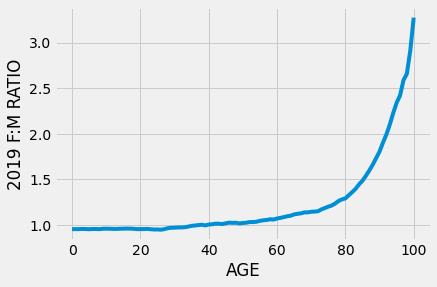

In [14]:
ratios.plot('AGE',ylabel = '2019 F:M RATIO').get_legend().remove()